In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2

C:\Users\Nikita\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

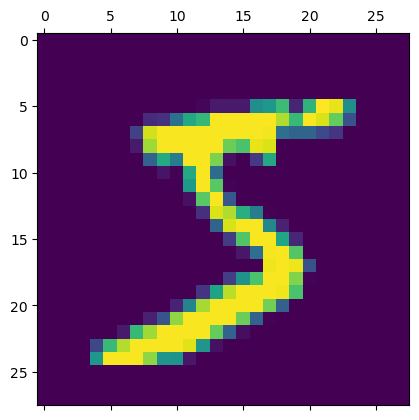

In [5]:
plt.matshow(X_train[0])

### flattening 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784, ), activation = 'sigmoid')
] )

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 10.2227 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0870 - accuracy: 0.8784
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7494 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4558 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4032 - accuracy: 0.8872


## to increase accuracy, we reduce the scalability

In [12]:
X_train_scal = X_train_flat/255
X_test_scal = X_test_flat/255

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784, ), activation = 'sigmoid')
] )
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scal, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4708 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9267


In [14]:
model.evaluate(X_test_scal, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9278


[0.2661075294017792, 0.9277999997138977]

In [15]:
y_predicted = model.predict(X_test_scal)
np.argmax(y_predicted[0])

313/313 [==============================] - 0s 890us/step


7

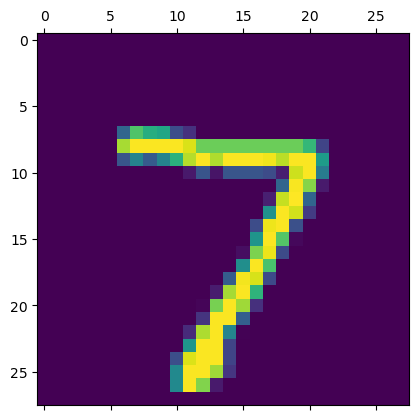

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    4,    2,    0,    6,    9,    3,    3,    0],
       [   0, 1108,    5,    1,    0,    1,    4,    2,   14,    0],
       [   3,    6,  954,   10,    8,    3,   12,    8,   25,    3],
       [   2,    0,   31,  910,    0,   23,    3,   12,   23,    6],
       [   1,    1,    4,    1,  923,    0,   12,    4,   11,   25],
       [   8,    2,    6,   30,   10,  777,   13,    4,   36,    6],
       [   7,    3,   10,    1,    7,   12,  913,    2,    3,    0],
       [   1,    5,   28,    4,    6,    0,    0,  953,    4,   27],
       [   4,    6,    9,   17,    9,   22,    9,   12,  881,    5],
       [   7,    7,    3,    8,   33,    7,    0,   25,   13,  906]])>

Text(95.72222222222221, 0.5, 'Truth')

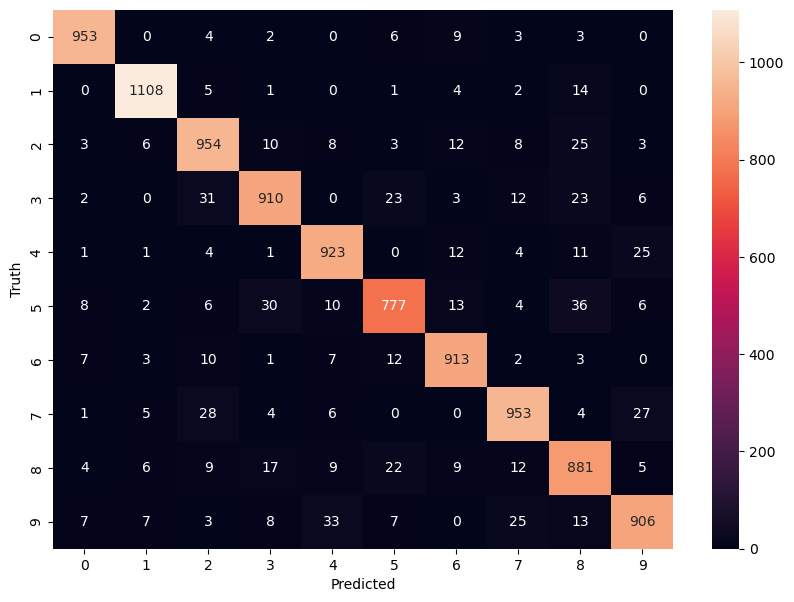

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## lets try introducing the hidden layer

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [21]:
y_predicted = model.predict(X_test)
np.argmax(y_predicted[0])

313/313 [==============================] - 0s 915us/step


7

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    1,    2,    1,    2,    1],
       [   0, 1125,    2,    2,    0,    0,    1,    1,    4,    0],
       [   8,    2,  996,    2,    1,    0,    2,   10,   11,    0],
       [   0,    0,    5,  990,    0,    2,    0,    7,    2,    4],
       [   3,    1,    3,    1,  951,    2,    4,    3,    1,   13],
       [   2,    0,    0,    7,    1,  870,    2,    0,    8,    2],
       [   8,    3,    0,    2,    3,    4,  935,    0,    3,    0],
       [   2,    4,    8,    1,    0,    0,    0, 1005,    2,    6],
       [   9,    2,    1,    3,    2,    5,    3,    4,  941,    4],
       [   3,    3,    0,    2,    2,    6,    1,    4,    4,  984]])>

Text(95.72222222222221, 0.5, 'Truth')

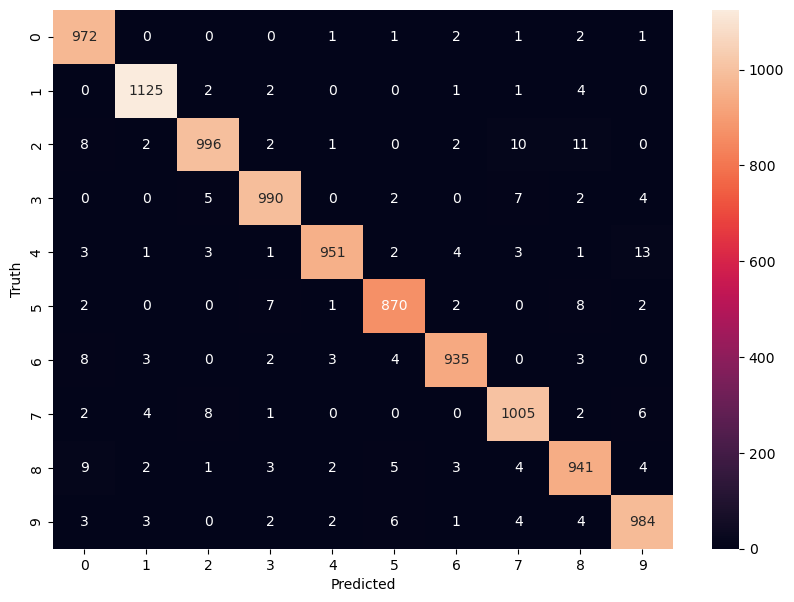

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# So by introducing hidden layer and by scaling, significant difference is created 
# Alone scaling creates a huge impact

# Lets try by giving our input through open cv

In [24]:
frame = cv2.imread(r"C:\Users\Nikita\Downloads\WhatsApp Image 2024-01-16 at 11.25.57_3c3df281.jpg")

In [25]:
frame = cv2.resize(frame, (28, 28)) 
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
frame = frame / 255.0 

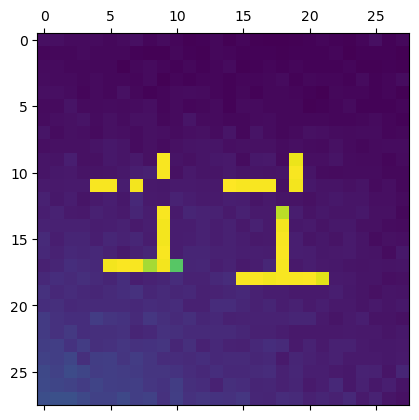

In [26]:
plt.matshow(frame)

In [27]:
# Reshape the image to match the model's input shape
input_image = np.reshape(frame, (1, 28, 28, 1))
prediction = model.predict(input_image)

1/1 [==============================] - 0s 30ms/step


In [ ]:
cv2.imshow('Input Image', frame)

# Display the prediction result
predicted_digit = np.argmax(prediction)
print(f'Predicted Digit: {predicted_digit}')

cv2.waitKey(0)
cv2.destroyAllWindows()

Predicted Digit: 9
